신경망의 가중치 매개변수의 기울기는 수치미분을 사용해 구했습니다.
수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다는 게 단점입니다.

이번 장에서는 가중치 매개변수의 기울기를 효율적으로 계산하는 '오차역전파법'을 배워보겠습니다.

수식을 통한 오차 역전파법 이해하는 방법과 계산 그래프르 통해 오차 역전파법을 이해 할 수 있다.

# 5.1 계산 그래프


여기서 그래프는 그래프 자료구조 (복수의 node와 edge로 표현)

계산 과정을 노드와 화살표로 표현한다.

- 노드 안에 연산 내용
- 화살표 위에 계산 결과<br>
  ➡ 계산 결과가 왼쪽에서 오른쪽으로 전해지게 함

계산이 왼쪽에서 오른쪽으로 진행하는 것을 순전파(forward propagation)라고 한다.
즉, 계산 그래프의 출발점부터 종착점으로의 전파

반대로 오른쪽에서 왼쪽으로 진행하는 것을 역전파(backward propagation)라고 한다.
📌역전파는 이후에 미분을 계산할 때 중요한 역할!

### 1-1) 국소적 계산
계산 그래프의 특징은 국소적 계산을 전파함으로써 최종 결과를 얻는다는 것!

국소적 계산: 자신과 직접 관계된 작은 범위
➡️ 결국 전체에서 어떤 일이 벌어지든 자신과 관계된 정보만으로 결과를 출력할 수 있다는 것

⭐각 노드에서의 계산은 국소적 계산!
각 노드는 자신과 관련한 계산 외에는 신경쓰지 않는다.

📌 전체 계산이 아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 '국소적 계산'
➡️ 국소적인 계산은 단순하지만, 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산 가능!

## 1-2) 왜 계산 그래프로 푸는가?
계산 그래프의 이점
1. 국소적 계산
    전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화 가능<br>
    
2. 중간 계산 결과를 모두 보관 가능

⭐3. 역전파를 통해 미분을 효율적으로 계산 가능

예를 들어 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지 알고 싶다면, '사과 가격에 대한 지불 금액의 미분'을 구하면 된다.
➡️ 계산 그래프에서 역전파를 하면 구할 수 있다!

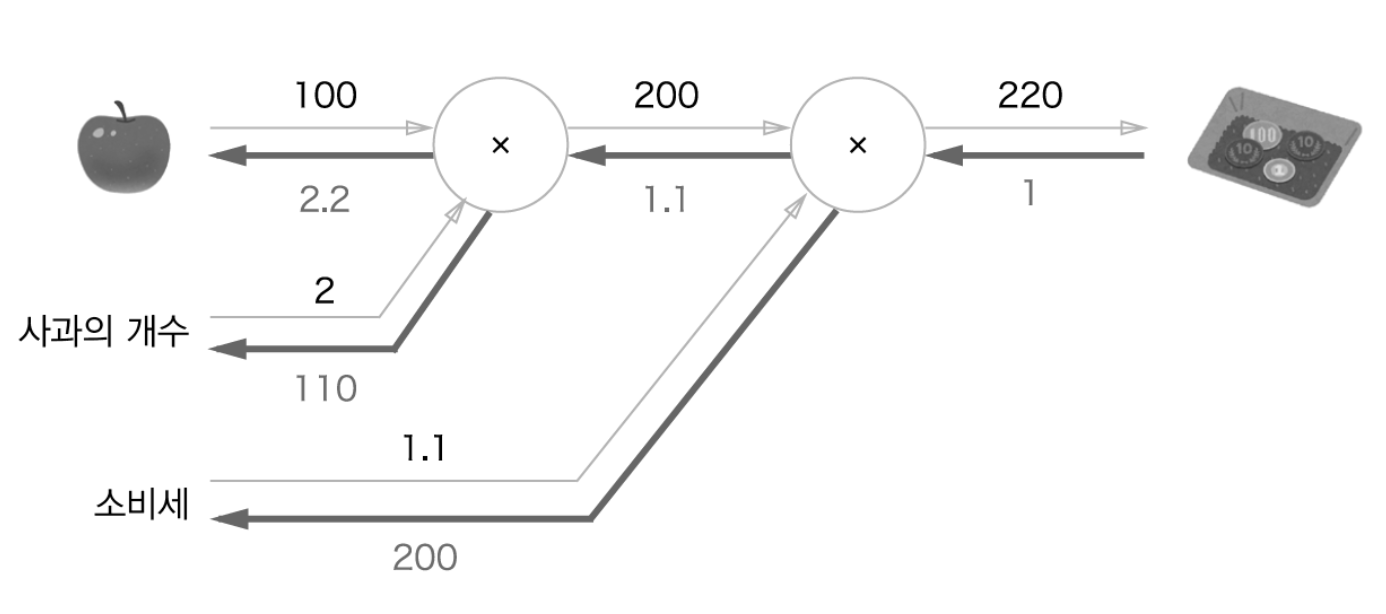

그림과 같이 역전파는 순전파와 반대 방향의 화살표로 그린다.<br>
➡️ 이 전파는 '국소적 미분'을 전달하고, 그 미분 값은 화살표의 아래에 적는다.<br>
<br>
여기에서 '사과 가격에 대한 지불 금액의 미분' 값은 2.2이다.<br>
그 외에도 '소비세에 대한 지불 금액의 미분'이나 '사과 개수에 대한 지불 금액의 미분'도 같은 순서로 구할 수 있다.<br>
➡️ 그때는 중간까지 구한 미분 결과를 공유할 수 있어서 다수의 미분을 효율적으로 계산할 수 있다!

📌 정리하자면, 계산 그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것!

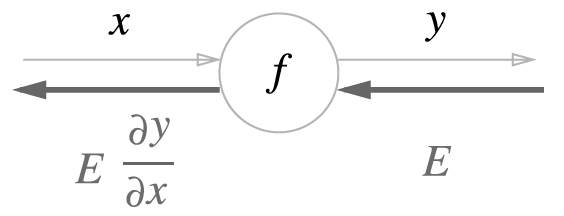

## 5.2.2 연쇄 법칙이란?


연쇄법칙은 합성 함수의 미분에 대한 성질

연쇄법칙의 원리
: 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다

합성 함수: 여러 함수로 구성된 함수

### 5.2-3) 연쇄법칙과 계산 그래프

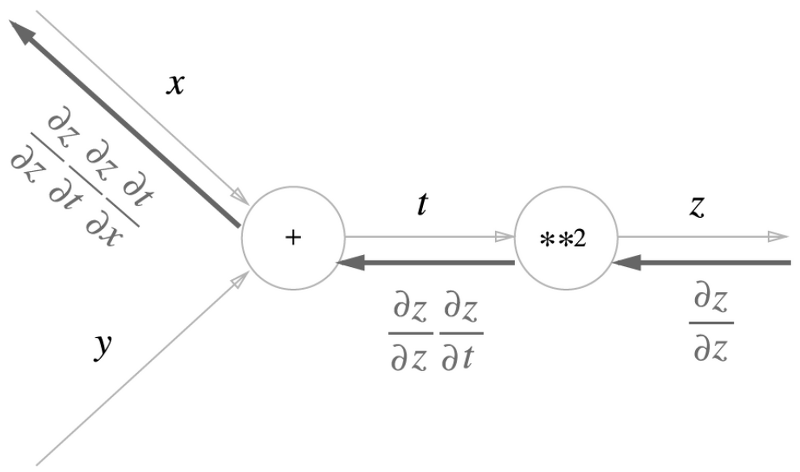

- 계산 그래프의 역전파는 오른쪽에서 왼쪽
- 노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달


위의 그림에서 역전파를 봐보자.

입력은 ∂z/∂z이며, 이에 국소적 미분인 ∂z/∂t(순전파 시에는 입력이 t이고 출력이 z이므로 이 노드에서 국소적 미분은 ∂z/∂t)를 곱하고 다음 노드로 넘긴다.

맨 왼쪽 역전파는 연쇄법칙에 따르면 (∂z/∂z)(∂z/∂t)(∂t/∂x) = (∂z/∂t)(∂t/∂x) = (∂z/∂x)가 성립되어 'x에 대한 z의 미분'이 된다.

즉, 역전파가 하는 일은 연쇄법칙의 원리와 같다.



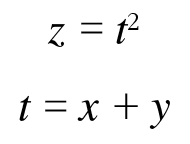

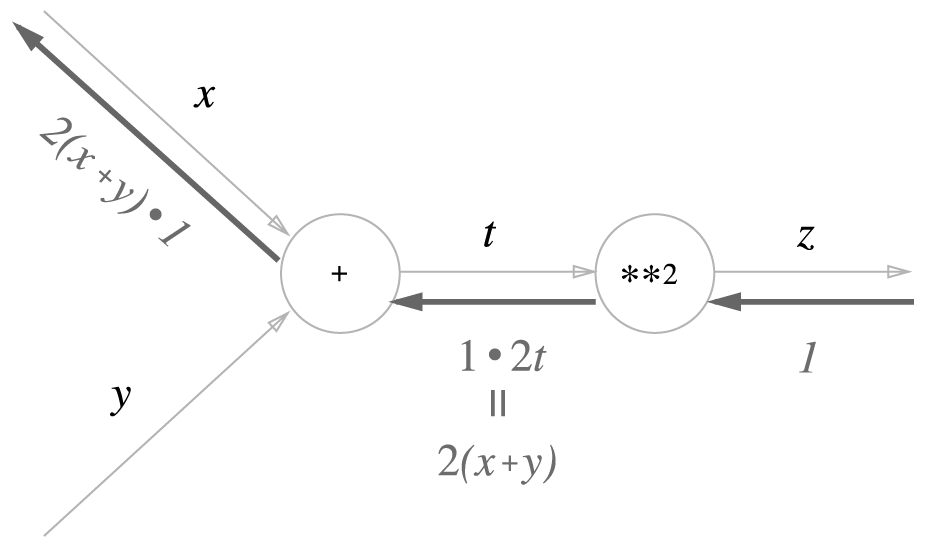

## 역전파  

3-1) 덧셈 노드의 역전파

z = x + y을 대상으로 역전파를 살펴보자.

∂z/∂x = 1, ∂z/∂y = 1
➡️ 상류에서 전해진 미분에 1을 곱하여 하류로 흘린다

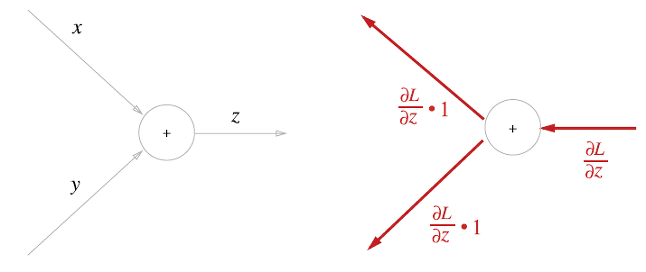

덧셈 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게 된다.

3-2) 곱셈 노드의 역전파

z = xy을 대상으로 역전파를 살펴보자.

∂z/∂x = y, ∂z/∂y = x

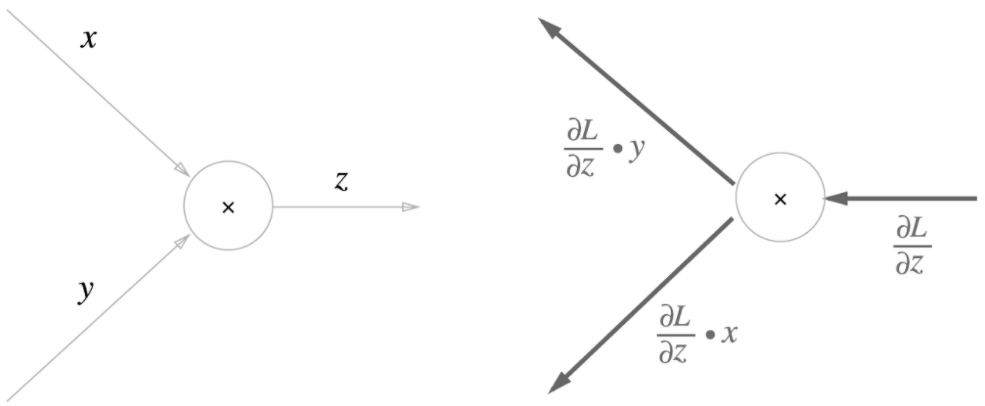

곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다.

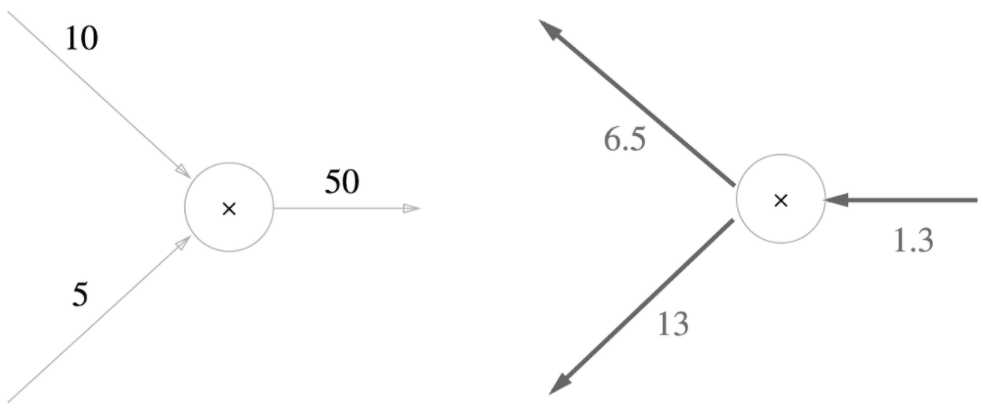

### 5-3) 사과 쇼핑의 예

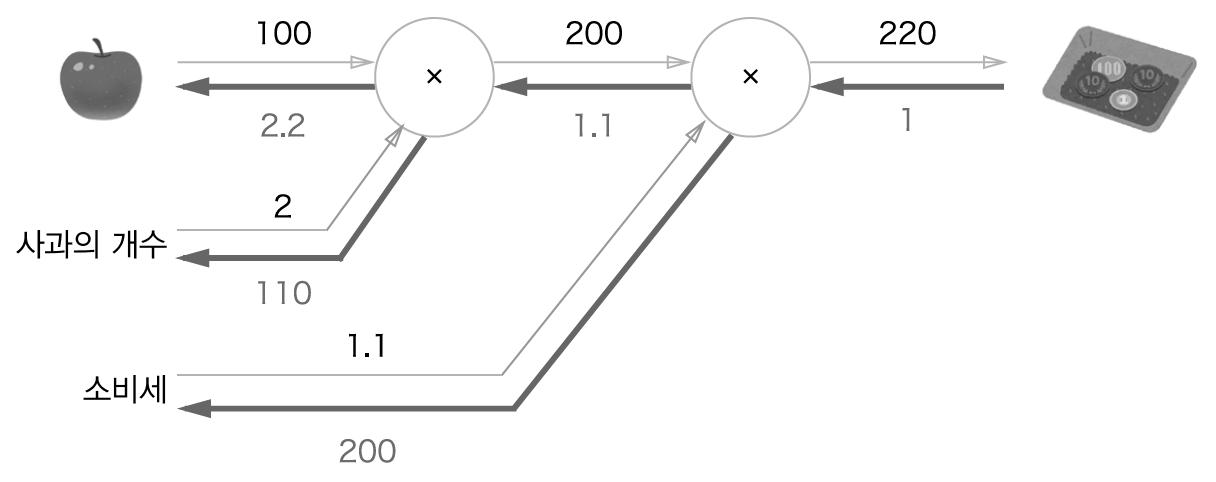

📌 곱셈 노드의 역전파에서는 입력 신호를 서로 바꿔서 하류로 흘린다는 것을 기억하자!

그림의 결과를 보면 소비세와 사과 가격이 같은 양만큼 오르면 최종 금액에는 소비세가 200의 크기로, 사과 가격이 2.2 크기로 영향을 준다고 할 수 있다. (단, 단위는 다름. 소비세 1은 100%, 사과 가격 1은 1원)

참고 UrL https://velog.io/@bbirong/%EB%B0%91%EB%94%A5-5%EC%9E%A5.-%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EB%B2%95-backpropagation

## 개인 정리 

우리가 구하고 싶은 값 :∂L/∂x =∂z/∂x \*∂L/∂z    x값이 변할때 최종값에 미치는 영향 , == **가중치!!**

덧셈 : ∂z/∂x =1, ∂z/∂y =1<br>
곱셈 : ∂z/∂x = y, ∂z/∂y =x